# I. Context and Description 

- Background Information
    
    The complete dataset contains 720,000 competitive matches from the popular game PlayerUnknown's Battlegrounds (PUBG). PUBG is a first/third-person shooter battle royale style game developed and published by PUBG Corporation. The game is based on previous mods that were created by Brendan "PlayerUnknown" Greene for other games using the film Battle Royale for inspiration, and expanded into a standalone game under Greene's creative direction. 
    
    In the game, up to 100 players parachute onto a remote island where teams and players fight to death until only one remains. Players are dropped from an airplane onto the island where they are to scavenge towns and buildings for weapons, vehicles and supplies. Players will then decide to either fight or hide with the ultimate goal of being the last one standing. The battleground shrinks a few minutes into the game as a bluezone appears and deals damage to anyone that stands inside the bluezone while sparing whoever is within the safe zone. As the available safe area of the game's map decreases in size over time, surviving players are directed into tighter areas and forced encouters. The last player or team standing wins the round.
    
    For analysis purposes and due to technical difficulties, we are only using one-fifth observations of the complete dataset. 

- Data Collection

    The data was collected by a Kaggle user with username "KP" in January 2018. He used a scraping methodology that first starts with an initial seed player, which he chose to be his own account (a somewhat low rank individual). Then, using the seed player, he scrapes for all players that it has encountered in its historical matches. Taking a random subset of 5000 players from this and scraping for their historical games, we obtain our final dataset. 
    
    A potential problem is that this could produce an unrepresentative sample of all games played since it is likely that players are queued and matched with other players of similar rank levels. In our case, it could be that the dataset is more representative of lower-tier gameplay. However, given the simplicity of the dataset, this should not be a significant issue. 

# II. Exploratory Analysis

Our big question is: how can we increase the probability of winning. We will be approaching this question from three different aspects: server type, number of kills, and vehicle use. 

## Data Importing & Cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

agg = pd.read_csv('/Users/grumpyboo/Desktop/Stats_131/project/aggregate/agg_match_stats_0.csv')
weapon = pd.read_csv('/Users/grumpyboo/Desktop/Stats_131/project/deaths/kill_match_stats_final_0.csv')

In [4]:
agg.drop_duplicates(inplace=True)

In [5]:
agg.shape

(13849287, 15)

In [6]:
agg.head()

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,1,2870.72400,1784.847780,117,1,SnuffIes,1106.320,4,18
1,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,1,2938.40723,1756.079710,127,1,Ozon3r,1106.315,4,18
2,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,0.00000,224.157562,67,0,bovize,235.558,5,33
3,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,0.00000,92.935150,0,0,sbahn87,197.553,5,33
4,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,2619.07739,2510.447000,175,2,GeminiZZZ,1537.495,14,11


### Reorganize the data & Select relevant variables

In [7]:
agg.columns
agg = agg[['player_name', 'game_size', 'party_size', 'player_kills', 'player_assists','player_dist_ride', 'player_survive_time', 'team_placement']]

In [8]:
agg.shape

(13849287, 8)

In [9]:
agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13849287 entries, 0 to 13849286
Data columns (total 8 columns):
player_name            object
game_size              int64
party_size             int64
player_kills           int64
player_assists         int64
player_dist_ride       float64
player_survive_time    float64
team_placement         int64
dtypes: float64(2), int64(5), object(1)
memory usage: 951.0+ MB


### Add categorical variables

In [10]:
# if game won
agg['win'] = agg['team_placement'] == 1
agg['player_dist_ride'].describe()

count    1.384929e+07
mean     1.156424e+03
std      1.995396e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.899670e+03
max      4.748712e+05
Name: player_dist_ride, dtype: float64

In [11]:
# if player used vehicles
agg['vehicle'] = agg['player_dist_ride'] != 0
agg.columns

Index(['player_name', 'game_size', 'party_size', 'player_kills',
       'player_assists', 'player_dist_ride', 'player_survive_time',
       'team_placement', 'win', 'vehicle'],
      dtype='object')

In [12]:
agg['game_size'].describe()

count    1.384929e+07
mean     4.714748e+01
std      2.517672e+01
min      4.000000e+00
25%      2.700000e+01
50%      4.300000e+01
75%      5.000000e+01
max      1.000000e+02
Name: game_size, dtype: float64

Text(0.5,1,'Percentage of Winning Players vs. Number of Teams')

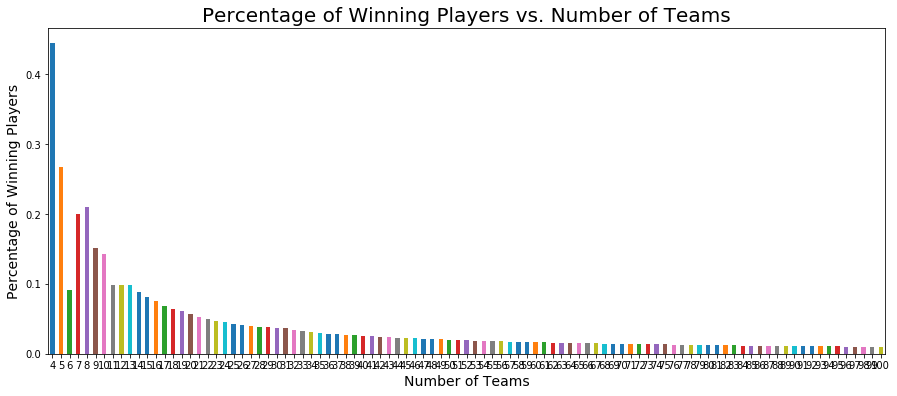

In [13]:
agg = agg.sort_values(by='game_size')
agg.groupby('game_size').win.mean().plot.bar(figsize=(15,6), rot=0)
plt.xlabel('Number of Teams', fontsize=14)
plt.ylabel('Percentage of Winning Players', fontsize=14)
plt.title('Percentage of Winning Players vs. Number of Teams', fontsize=20)
plt.show()

In [14]:
agg = agg.loc[agg['game_size'] > 10, :]
agg.shape

(13849082, 10)

In [48]:
# two-way table
grouped = agg.groupby(['vehicle', 'party_size'])
grouped.size()

vehicle  party_size
False    1             1875140
         2             2593445
         4             3564175
True     1             1008030
         2             1852286
         4             2956006
dtype: int64

In [36]:
# summary statistics
agg.describe()

,game_size,party_size,player_kills,player_assists,player_dist_ride,player_survive_time,team_placement
count,1.384908e+07,1.384908e+07,1.384908e+07,1.384908e+07,1.384908e+07,1.384908e+07,1.384908e+07
mean,4.714806e+01,2.733420e+00,8.871939e-01,2.296268e-01,1.156409e+03,8.351107e+04,2.446159e+01
std,2.517645e+01,1.246391e+00,1.555386e+00,5.757960e-01,1.995386e+03,7.256211e+07,2.037429e+01
min,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.700000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.469810e+02,1.000000e+01
50%,4.300000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.530150e+02,2.000000e+01
75%,5.000000e+01,4.000000e+00,1.000000e+00,0.000000e+00,1.899628e+03,1.299363e+03,3.200000e+01
max,1.000000e+02,4.000000e+00,6.400000e+01,1.300000e+01,4.748712e+05,6.364822e+10,1.000000e+02


### Distributional Shape of Variables

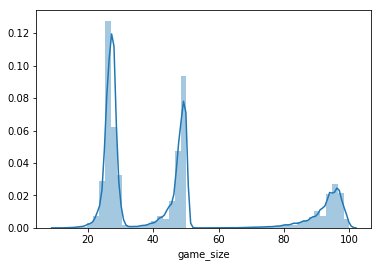

In [41]:
sns.distplot(agg['game_size'])

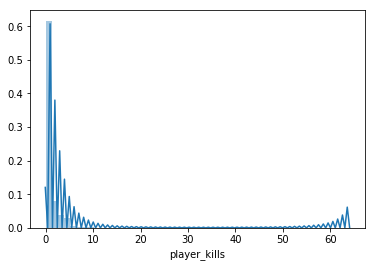

In [39]:
sns.distplot(agg['player_kills'])

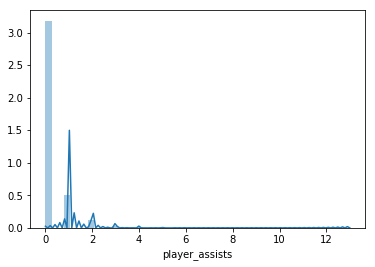

In [40]:
sns.distplot(agg['player_assists'])

## 1. Should you play by yourself or with a team? 

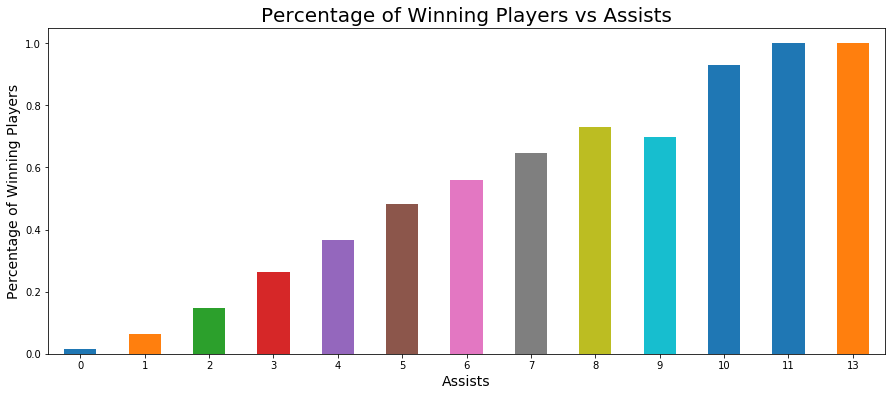

In [26]:
agg.loc[agg['party_size']>1, ['player_assists', 'win']].groupby('player_assists').win.mean().plot.bar(figsize=(15,6), rot=0)
plt.xlabel('Assists', fontsize=14)
plt.ylabel("Percentage of Winning Players", fontsize=14)
plt.title('Percentage of Winning Players vs Assists', fontsize=20)
plt.show()

The graph shows that there is a positive relationship between assist and winning. In particular, 5 assists indicates a winning ratio of 50% while 11 assists would almost ensure winning. Therefore, players should definitely team up to increase their chances of winning. 

## 2. Would killing more players increase the probability of winning? 

### (1) Shooting Skills (aka number of kills)

In [16]:
agg['player_kills'].describe()

count    1.384908e+07
mean     8.871939e-01
std      1.555386e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      6.400000e+01
Name: player_kills, dtype: float64

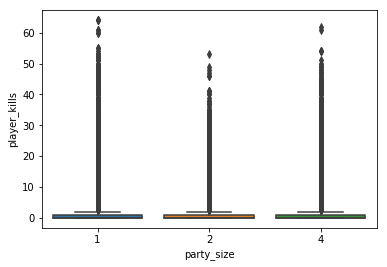

In [17]:
# side-by-side boxplot: looking at distribution and outliers of variable player_kills
sns.boxplot(x="party_size", y="player_kills", data=agg)

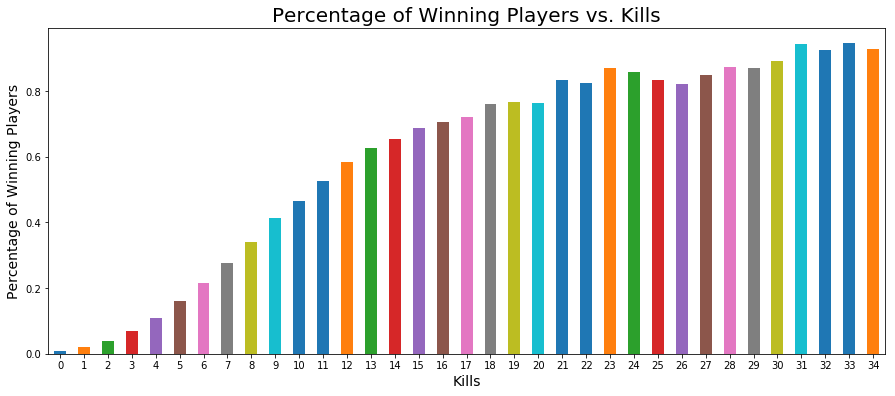

In [18]:
agg.loc[agg['player_kills'] < 35, ['player_kills', 'win']].groupby('player_kills').win.mean().plot.bar(figsize=(15,6), rot=0)
plt.xlabel('Kills', fontsize=14)
plt.ylabel("Percentage of Winning Players", fontsize=14)
plt.title('Percentage of Winning Players vs. Kills', fontsize=20)
plt.show()

The graph above shows that there is a positive relationship between the number of kills and the win ratio. In particular, killing 7 people indicates a winning ratio of approximately 30%, killing 10 people indicates a winning ratio of 50%, and kiling 15 indicates a ratio of 75%. Therefore, to increase their probability of winning, players should choose to practice and improve their shooting skills rather than hide and camouflage. 

In [19]:
agg.groupby('party_size').player_kills.mean()

party_size
1    0.897310
2    0.897051
4    0.876000
Name: player_kills, dtype: float64

Text(0.5,1,'Kills Per Game for Different Server Type')

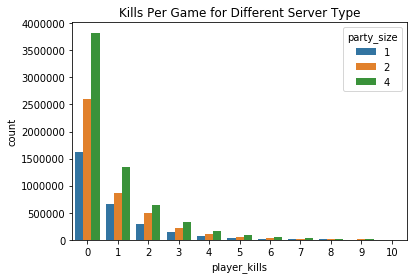

In [20]:
agg2 = agg.loc[agg['player_kills']<=10, ['party_size', 'player_kills']]
sns.countplot(x='player_kills',hue = 'party_size', data=agg2).set_title('Kills Per Game for Different Server Type')

This graph shows that for all server types, it is very difficult to achieve 7 kills. In fact, most players are distributed between 0 and 1. 

### (2) Choice of Weapons

In [21]:
weapon.head()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,Grenade,KrazyPortuguese,5.0,657725.10,146275.2,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,KrazyPortuguese,5.0,657725.10,146275.2
1,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,92238.68,723375.1
2,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.50,421216.1
3,Down and Out,Weirdo7777,9.0,472014.20,313274.8,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,BlackDpre,13.0,476645.90,316758.4
4,M416,Solayuki1,9.0,473357.80,318340.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,Vjolt,13.0,473588.50,318418.8


In [22]:
weapon = weapon[['victim_name', 'killer_name', 'killed_by', 'victim_placement']]
weapon['final'] = weapon['victim_placement'] <= 20
weapon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13426348 entries, 0 to 13426347
Data columns (total 5 columns):
victim_name         object
killer_name         object
killed_by           object
victim_placement    float64
final               bool
dtypes: bool(1), float64(1), object(3)
memory usage: 422.5+ MB


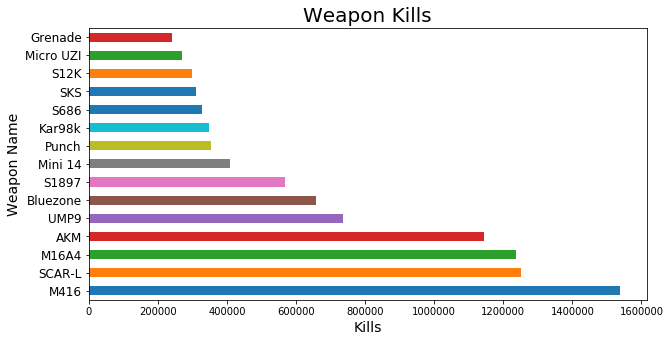

In [27]:
weapon['killed_by'].value_counts()[1:16].plot.barh(figsize=(10,5))
plt.xlabel("Kills", fontsize=14)
plt.ylabel("Weapon Name", fontsize=14)
plt.title('Weapon Kills', fontsize=20)
plt.yticks(fontsize=12)
plt.show()

The graph above shows that the top kill weapons are M416, SCAR-L, M16A4, and AKM. It would be wise to look for these weapons during a game to increase the probability of winning. 

### Fun Fact: Ways of Suicide

In [24]:
suicide = weapon.loc[(weapon['killer_name']==weapon['victim_name'])&(weapon['killed_by']!='Down and Out'), "killed_by"]

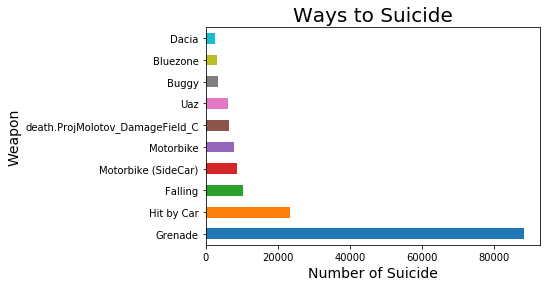

In [25]:
suicide.value_counts()[:10].plot.barh()
plt.xlabel("Number of Suicide", fontsize=14)
plt.ylabel("Weapon", fontsize=14)
plt.title('Ways to Suicide', fontsize=20)
plt.yticks(fontsize=10)
plt.show()

As the highest cause of suicide, grenade also ranks lowest on weapon kills. So be extra careful when using a grenade!

# 3. Should you travel by vehicles or by foot? 

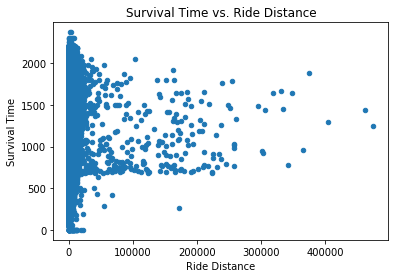

In [28]:
agg = agg.sort_values(by='player_dist_ride')
agg1 = agg.loc[agg['player_survive_time'] < 10000,:]

# scatter plot: no significant relationship between vehicle use and survival time
agg1.plot.scatter(x='player_dist_ride', y='player_survive_time')
plt.xlabel('Ride Distance')
plt.ylabel('Survival Time')
plt.title('Survival Time vs. Ride Distance')
plt.show()

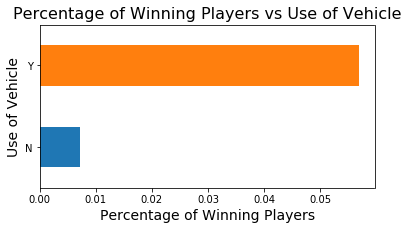

In [29]:
agg.groupby('vehicle').win.mean().plot.barh(figsize=(6,3))
plt.xlabel("Percentage of Winning Players", fontsize=14)
plt.ylabel("Use of Vehicle", fontsize=14)
plt.title('Percentage of Winning Players vs Use of Vehicle', fontsize=16)
plt.yticks([1,0],['Y','N'])
plt.show()

The graph shows that the win ratio without vehicle use is 0.007, and that with vehicle use is 0.058. This means that using vehicles can increase winning probability by 8 times!

Text(0.5,1,'Use of Vehicles for Different Party Size')

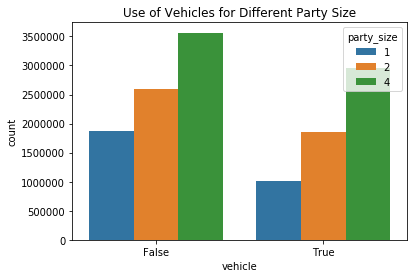

In [30]:
sns.countplot(x="vehicle",hue = 'party_size', data=agg).set_title("Use of Vehicles for Different Party Size")

This shows that more players neglect the use of vehicles than not across all server types.

# III. Data Modeling

Since our response variable is binary, we will be using logistic regression. Based on previous analysis, we decided to use the variables 'player_kills', 'game_size', and 'player_assits' as predictors for our model. 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

/Users/grumpyboo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
print(agg[['game_size','player_kills','player_assists','vehicle']].corr())

                game_size  player_kills  player_assists   vehicle
game_size        1.000000      0.005711       -0.161098 -0.078387
player_kills     0.005711      1.000000        0.248486  0.241444
player_assists  -0.161098      0.248486        1.000000  0.212889
vehicle         -0.078387      0.241444        0.212889  1.000000


### split data

In [33]:
X = agg[['game_size','player_kills','player_assists']]
y = agg.win
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

game_size = x_train.game_size
kills = x_train.player_kills
assist = x_train.player_assists

In [34]:
train_features = pd.DataFrame([game_size,
                              kills,
                              assist]).T

# Initialize logistic regression model
log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(X = train_features,
              y = y_train)

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[-3.84925723]
[[-0.01973265  0.43304255  0.73491517]]


In [42]:
# Make predictions
preds = log_model.predict(X = train_features)

# Generate table of predictions vs actual
pd.crosstab(preds,y_train)

win,False,True
row_0,,
False,9396639,242063
True,25840,29815


In [43]:
# Prediction accuracy metrics
log_model.score(X = train_features ,
                y = y_train)

0.9723650573214913

In [44]:
#use test data
game_size_test = x_test.game_size
kills_test = x_test.player_kills
assist_test = x_test.player_assists

In [45]:
test_features = pd.DataFrame([game_size_test,
                              kills_test,
                              assist_test]).T

In [46]:
y_pred = log_model.predict(X = test_features)
pd.crosstab(y_pred,y_test)

win,False,True
row_0,,
False,4026664,103964
True,11140,12957


In [47]:
# Prediction accuracy metrics using test data
log_model.score(X = test_features ,
                y = y_test)

0.9722956393022402

# IV. Video Presentation

Link: 